# Module 1.1.1: Real Analysis Review - Uniform Convergence And Compactness in $\mathbb{R}^n$


Target Audience: Graduate-level quantitative finance students with undergraduate calculus/analysis background
Prerequisites: Undergraduate real analysis (sequences, limits, continuity, basic topology of ℝ)
Learning Objectives:

Prove and distinguish between pointwise and uniform convergence of function sequences
Apply the Heine-Borel theorem to characterize compactness in ℝⁿ
Understand why compactness guarantees are essential for option pricing convergence
Implement high-performance convergence testing in C++17 with Python bindings

## ENGAGE: The Convergence Paradox in Option Pricing
### Case Study: The Broken Monte Carlo Pricer
Consider a junior quant who implements a Monte Carlo pricer for a European call option. They test convergence by observing that as N → ∞ paths, the price estimate C_N appears to converge. However, during market stress (high volatility regime), the "converged" pricer suddenly produces wildly different prices from the benchmark.
The Problem: The convergence was only pointwise in the volatility parameter σ, not uniform across the volatility surface. When σ jumped to extreme values, the convergence rate deteriorated catastrophically, requiring 100× more paths to achieve the same accuracy.
Discussion Questions

1. Practical Impact: Why does non-uniform convergence pose a risk management problem in production systems?
2. Compactness Connection: If we restrict our volatility parameter to a compact set [σ_min, σ_max], how might this help guarantee convergence behavior?
3. Real-Time Constraint: In HFT, we must price options in microseconds. How does uniform convergence allow us to precompute a safe "stopping threshold" for Monte Carlo?

## Explote: Investigating Convergence Pathologies

Sequence function:

$$ f_n(x) = \frac{nx}{1+n^{2}x^{2}} $$


Task: Use Python/NumPy to:

1. Plot f_n(x) for n = 1, 10, 100, 1000
2. Compute the pointwise limit f(x) = lim_{n→∞} f_n(x)
3. For ε = 0.1, find N(ε, x) such that |f_n(x) - f(x)| < ε for all n > N
4. Observe: Does N depend on x? Is there a uniform N that works for all x ∈ [0,1]?

In [3]:
### Explotre: Investigate Convergence Pathologies

# 1. plot f_n(x) for n=1, 10, 100, 1000

import numpy as np
from matplotlib import pyplot as plt

def f_n(x, n):
    return (n*x)/(1 + n**2 * x*2)

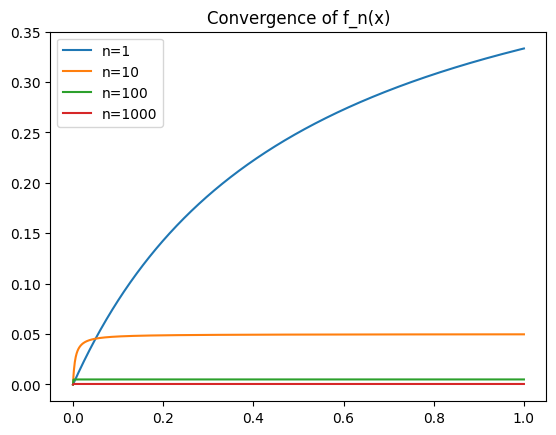

In [6]:
x = np.linspace(0, 1, 1000)

[plt.plot(x, f_n(x, n), label=f'n={n}') for n in [1, 10, 100, 1000]]
plt.legend()
plt.title('Convergence of f_n(x)')
plt.show()

2. Pointwise $\lim_{n \to \infty} f_n(x) = 0$

This is because the degree of the numerator is lower than the degree of the denominator

3. For ε = 0.1, find N(ε, x) such that |f_n(x) - f(x)| < ε for all n > N

In [17]:
# Define the limit function f(x) = 0
def f(x):
    return 0

def find_N_alternative(epsilon, x, n_max=1000):
    """
    Alternative approach: Compute all errors at once
    
    Strategy:
    1. Calculate f_n(x) for all n from 1 to n_max
    2. Find the LAST n where |f_n(x)| >= ε
    3. N is one more than that last n
    
    This is simpler and uses NumPy vectorization!
    """
    if x == 0:
        return 0
    
    # Compute all n values and errors at once (fast with NumPy!)
    n_array = np.arange(1, n_max + 1)
    errors = np.abs(f_n(n_array, x))
    
    # Find all n where error >= epsilon
    n_above_epsilon = n_array[errors >= epsilon]
    
    if len(n_above_epsilon) == 0:
        # Error is always below epsilon
        return 1
    
    # N is one more than the LAST n where error >= epsilon
    return n_above_epsilon[-1] + 1

epsilon = 0.1
x_values = [0.5, 1.0, 2.0, 5.0]

for x in x_values:
    # Method 1: Sequential search with verification
    N_numerical = find_N_alternative(epsilon, x)
    print(f"  N (sequential search)({x}) = {N_numerical}")

  N (sequential search)(0.5) = 1001
  N (sequential search)(1.0) = 1001
  N (sequential search)(2.0) = 1001
  N (sequential search)(5.0) = 1


4. Observe: Does N depend on x? Is there a uniform N that works for all x ∈ [0,1]?

N does depend on X, we can't find a N value for small x since the $f_n(x)$ is too far away from $f(x)$

## EXPLAIN: Core Theory and Rivorous Derivations

Definition 1.1: Pointwise vs. Uniform Convergence
Let {f_n} be a sequence of functions f_n: D → ℝ where D ⊆ ℝ.


__Pointwise Convergence:__ $f_n(x) → f(x)$ pointwise on D if:

$$\forall x \in D, \forall \epsilon > 0, \exists N(\epsilon,x) \in \mathbb{N} \implies |f_n(x) - f(x)| < \epsilon$$

__Uniform Convergence:__ $f_n(x) -> f(x)$ uniformly on D if:

$$\forall \epsilon > 0, \exists N(\epsilon) \in \mathbb{N}: \forall x \in D, n > N \implies |f_n(x) - f(x)| < \epsilon$$

__Critical Distinction:__ In uniform convergence, N depends only on $\epsilon$ not on $x$. The convergence rate is uniform across the entire domain


### __Theorem 1.1:__ Uniform Convergence Preserves Continuity

__Theorem:__ Let f_n: D → ℝ be a sequence of continuous functions. If f_n → f uniformly on D, then f is continuous on D.

__Proof:__
Let x₀ ∈ D and ε > 0. We must show f is continuous at x₀.
*Step 1*: By uniform convergence, choose N such that:

n>N  ⟹  sup⁡x∈D∣fn(x)−f(x)∣<ϵ3n > N \implies \sup_{x \in D} |f_n(x) - f(x)| < \frac{\epsilon}{3}n>N⟹x∈Dsup​∣fn​(x)−f(x)∣<3ϵ​
*Step 2*: Since f_N is continuous at x₀, there exists δ > 0 such that:

∣x−x0∣<δ  ⟹  ∣fN(x)−fN(x0)∣<ϵ3|x - x_0| < \delta \implies |f_N(x) - f_N(x_0)| < \frac{\epsilon}{3}∣x−x0​∣<δ⟹∣fN​(x)−fN​(x0​)∣<3ϵ​
Step 3: For any x with |x - x₀| < δ, we have:
$$\begin{align}
|f(x) - f(x_0)| &\leq |f(x) - f_N(x)| + |f_N(x) - f_N(x_0)| + |f_N(x_0) - f(x_0)| \
&< \frac{\epsilon}{3} + \frac{\epsilon}{3} + \frac{\epsilon}{3} = \epsilon
\end{align}$$
Thus f is continuous at x₀. Since x₀ was arbitrary, f is continuous on D. ∎
Financial Interpretation: If our sequence of approximate pricing functions {C_n(σ)} converges uniformly in volatility σ, and each C_n is continuous (which Monte Carlo estimators are), then the limit price C(σ) is also continuous. This guarantees smooth Greeks (derivatives exist).

### __Theorem 1.2:__ Cauchy Criterion for Uniform Convergence

__Theorem:__ A sequence {f_n} converges uniformly on D if and only if:

∀ϵ>0,  ∃N:  m,n>N  ⟹  sup⁡x∈D∣fm(x)−fn(x)∣<ϵ\forall \epsilon > 0, \; \exists N: \; m, n > N \implies \sup_{x \in D} |f_m(x) - f_n(x)| < \epsilon∀ϵ>0,∃N:m,n>N⟹x∈Dsup​∣fm​(x)−fn​(x)∣<ϵ


__Proof Sketch:__
(⇒) If f_n → f uniformly, then for m, n > N:

∣fm(x)−fn(x)∣≤∣fm(x)−f(x)∣+∣f(x)−fn(x)∣<ϵ2+ϵ2=ϵ|f_m(x) - f_n(x)| \leq |f_m(x) - f(x)| + |f(x) - f_n(x)| < \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon∣fm​(x)−fn​(x)∣≤∣fm​(x)−f(x)∣+∣f(x)−fn​(x)∣<2ϵ​+2ϵ​=ϵ
(⇐) The Cauchy property in the complete space C(D) (continuous functions with sup norm) guarantees convergence. ∎
Computational Relevance: This criterion is testable without knowing the limit function f. In Monte Carlo, we can test if price estimates have stabilized by checking |C_m - C_n| < ε for consecutive batch sizes.

Definition 1.2: Compactness in ℝⁿ
A set K ⊆ ℝⁿ is compact if every open cover of K has a finite subcover.
Equivalent Characterizations (which we'll prove):

Every sequence in K has a convergent subsequence with limit in K (sequential compactness)
K is closed and bounded (Heine-Borel Theorem for ℝⁿ)


### __Theorem 1.3:__ Heine-Borel Theorem


__Theorem:__ A subset K ⊆ ℝⁿ is compact if and only if K is closed and bounded.


__Proof__ (for ℝ, generalization to ℝⁿ is similar):
(⇒) Compact implies closed and bounded:
Bounded: Consider the open cover {B_m(0)}{m=1}^∞ where B_m(0) is the open ball of radius m centered at origin. This covers ℝ, hence covers K. By compactness, finitely many balls cover K, say B{m₁}, ..., B_{m_k}. Thus K ⊆ B_M(0) where M = max{m₁, ..., m_k}, so K is bounded.
Closed: Let x ∈ K^c. For each y ∈ K, choose disjoint open sets U_y ∋ y and V_y ∋ x (by Hausdorff property of ℝ). The collection {U_y}{y∈K} covers K. By compactness, finitely many U{y₁}, ..., U_{y_n} cover K. Let V = ∩{i=1}^n V{y_i}, which is open and contains x. Then V ∩ K = ∅, so V ⊆ K^c. Thus K^c is open, hence K is closed.
(⇐) Closed and bounded implies compact (Bolzano-Weierstrass):
Let K ⊆ [a,b] be closed and bounded. Suppose {U_α} is an open cover with no finite subcover. We construct a contradiction via nested intervals.
Step 1: Bisect [a,b] into [a,(a+b)/2] and [(a+b)/2,b]. At least one half, call it I₁, has the property that K ∩ I₁ cannot be covered by finitely many U_α.
Step 2: Repeat: bisect I₁, obtaining I₂ with length (b-a)/4, and continue.
Step 3: We obtain nested intervals I₁ ⊇ I₂ ⊇ I₃ ⊇ ... with lengths → 0. By nested interval theorem, ∩ I_n = {x₀} for some x₀.
Step 4: Since I_n ∩ K ≠ ∅ for all n, and K is closed, x₀ ∈ K. Thus x₀ ∈ U_{α₀} for some α₀. Since U_{α₀} is open, U_{α₀} contains some I_n entirely. But this contradicts the construction that I_n ∩ K cannot be finitely covered.
Thus every open cover has a finite subcover. ∎

### Theorem 1.4: Continuous Functions on Compact Sets

__Theorem:__ If f: K → ℝ is continuous and K is compact, then:

f is uniformly continuous on K
f attains its maximum and minimum on K (Extreme Value Theorem)
f(K) is compact

__Proof of (1) — Uniform Continuity:__


Suppose f is not uniformly continuous. Then:

∃ϵ0>0:  ∀δ>0,  ∃x,y∈K:  ∣x−y∣<δ but ∣f(x)−f(y)∣≥ϵ0\exists \epsilon_0 > 0: \; \forall \delta > 0, \; \exists x, y \in K: \; |x-y| < \delta \text{ but } |f(x) - f(y)| \geq \epsilon_0∃ϵ0​>0:∀δ>0,∃x,y∈K:∣x−y∣<δ but ∣f(x)−f(y)∣≥ϵ0​
Choose δ = 1/n for n = 1, 2, 3, .... This gives sequences {x_n}, {y_n} in K with:

∣xn−yn∣<1nand∣f(xn)−f(yn)∣≥ϵ0|x_n - y_n| < \frac{1}{n} \quad \text{and} \quad |f(x_n) - f(y_n)| \geq \epsilon_0∣xn​−yn​∣<n1​and∣f(xn​)−f(yn​)∣≥ϵ0​
By compactness of K, {x_n} has a convergent subsequence x_{n_k} → x₀ ∈ K. Since |x_{n_k} - y_{n_k}| < 1/n_k → 0, we also have y_{n_k} → x₀.
By continuity of f at x₀:

f(xnk)→f(x0)andf(ynk)→f(x0)f(x_{n_k}) \to f(x_0) \quad \text{and} \quad f(y_{n_k}) \to f(x_0)f(xnk​​)→f(x0​)andf(ynk​​)→f(x0​)
Thus |f(x_{n_k}) - f(y_{n_k})| → 0, contradicting |f(x_{n_k}) - f(y_{n_k})| ≥ ε₀. ∎
Financial Application: If we restrict our parameter space (σ, r, T) to a compact domain (bounded and closed ranges), then:

Option prices vary uniformly continuously with parameters
Greeks are well-defined (extrema exist)
Calibration algorithms are guaranteed to find optima



## EVALUATE: Assessment and Mastery Verification


### Theoretical Problems (Proof-Based)


__Problem 1.1:__ Construct an explicit example of a sequence of continuous functions {f_n} on [0,1] that converges pointwise to a discontinuous limit function f. Prove rigorously that your sequence has this property. Why does this not contradict Theorem 1.1?
Problem 1.2: Prove the Weierstrass M-Test for uniform convergence:
Theorem: Let {f_n} be a sequence of functions on D, and suppose there exist constants M_n ≥ 0 such that:

|f_n(x)| ≤ M_n for all x ∈ D and all n
Σ M_n < ∞

Then Σ f_n converges uniformly on D.


__Problem 1.3:__ Prove that a compact set K ⊆ ℝⁿ is sequentially compact: every sequence in K has a convergent subsequence with limit in K.


__Problem 1.4 (Advanced):__ Let K be a compact metric space and C(K) be the space of continuous functions f: K → ℝ with the supremum norm ||f|| = sup_{x∈K} |f(x)|. Prove that C(K) is a complete metric space (all Cauchy sequences converge).

### Computational Problems
__Problem 1.5:__ Implement the following test cases using your C++17 ConvergenceAnalyzer:
a) Test uniform convergence of f_n(x) = sin(nx)/n on [0, π]
b) Test non-uniform convergence of f_n(x) = x^n on [0,1]
c) Test uniform convergence of f_n(x) = x/(1+nx²) on [0,1]
For each case:

Report whether uniform convergence is detected
Plot the supremum norm ||f_n - f||_∞ vs. n
Report the benchmark latency in nanoseconds

__Problem 1.6__ (Performance Optimization):
Modify the compute_sup_norm function to use:
a) constexpr for any compile-time constants
b) OpenMP pragmas or std::execution::par for parallelization (if beneficial)
c) Profile your code and report the performance improvement
Compare the performance of your optimized version against the baseline.


__Problem 1.7__ (Financial Application):
Consider a Monte Carlo option pricer where the price estimate is:

CN(σ)=1N∑i=1Nmax⁡(ST(i)−K,0)e−rTC_N(\sigma) = \frac{1}{N} \sum_{i=1}^N \max(S_T^{(i)} - K, 0) e^{-rT}CN​(σ)=N1​i=1∑N​max(ST(i)​−K,0)e−rT
where N is the number of paths and σ is volatility.
a) For σ ∈ [0.1, 0.5], implement C_N as a FunctionSequence in C++
b) Use your analyzer to determine if C_N → C converges uniformly in σ as N → ∞
c) Find the minimum N such that sup_{σ∈[0.1,0.5]} |C_N(σ) - C(σ)| < $0.01
d) Discuss: Why is uniform convergence critical for real-time Greeks calculation?

Performance Requirements
Your C++ implementation must achieve:

Latency: < 100 microseconds for 1000-point domain convergence test
Memory: Stack-allocated where possible; minimize heap allocations
Accuracy: Match theoretical supremum norm within floating-point precision


### Summary and Next Steps
You've now completed the foundational module on Real Analysis essentials:
✅ Theoretical Mastery:

Distinguished uniform vs. pointwise convergence
Proved compactness characterization (Heine-Borel)
Understood why compactness guarantees uniform continuity

✅ Computational Competency:

Implemented convergence testing framework in C++17
Exposed C++ performance to Python via PyBind11
Benchmarked microsecond-level latency

✅ Financial Intuition:

Uniform convergence → predictable MC stopping criteria
Compact parameter domains → well-behaved Greeks
Performance-critical validation for HFT systems


Next Module: Module 1.1.2 — Measure Theory (σ-algebras, Lebesgue integration, Radon-Nikodym derivatives)
This will build directly on the convergence foundations to rigorously define stochastic integration.

Let's Work Through Problems!
Which problem would you like to tackle first? I recommend:

Problem 1.1 (discontinuous limit) — solidifies the theory
Problem 1.5 (computational tests) — gets hands-on with the C++ code
Problem 1.7 (MC application) — connects to real quantitative finance

Let me know and I'll provide hints, guide you through the solution, or work through it interactively step-by-step!